* reading Gentle's book on _Random Number Generation_ (2nd ed)

* note to self: we really need to get into monte carlo methods...

### sup. reading of first chapters

* there are a lot of concerns to have when trying to generate random numbers...
* first, there's a somewhat fuzzy distinction between true random numbers/events, and pseudo-random ones:
    * we say we have a **true random number/event** when we do not know the process that generates it (even, we guess, when we _know_ its general properties - i.e., the distribution of the associated r.v.)
        * e.g.: quantum mechanical events like the spin of an electron (some skeptic could say that it's just on our lack of information to the underlying process) - goodfellow (following perl) called this inherent stochasticity of the system... well!
    * more-so, a **sequence of numbers** (with the same _source_) would be **truly random** when the knowledge of past elements in the sequence does not alter our knowledge of the next element
    * by oposition (wrt our knowledge), a **pseudo-random number** is just a number which:
        * looks random to someone who does not know the underlying process (and here we see the importance of perspective Jaynes so tells us about! ehe)
        * is produced by a known (to someone...) process
    * **pseudo-random sequences of numbers** follow the same logic
    * finally, there would be _deterministic_ numbers - which do not look random to anyone? ehe

* the distinction being fundamentally fuzzy wrt to knowledge, is still very important in practice - for there are a lot of application to random number generators:
    * from everything with applied monte carlo methods: be it physics, biology, finance, ...
    * to cryptography
* and these applications have opposite concerns with respect to knowing the process that generated the process:
    * in physics and biology applications, as we would be mostly interested in correctly applying monte carlo approximations, knowing the process that generates the random samples is not a concern (or, if it is, one would side on knowing it..!) - as long as it has the desired properties of the wanted distribution
    * in cryptography applications, if knowing the random number to be generated gives essential knowledge on the encryption key - then of course one has to have further concerns with how much the process may be known, or exposes it self: more specifically, one has to be concerned with pseudo-random sequences that are quickly telling of the underlying generation mechanism - and the distinction becomes relevant in that we care about how hard (or even impossible - to everyone's knowledge) it is to know the mechanism

* in the 90s there was (already) some work on plugging external sources of random numbers into a computer (with ion count decay etc)
* there are a lot of products nowadays that provide this - we guess - but not the focus nor the interest... ehe

* by the exposition structure of the book, one would assume the primary concern is 
    * to generate numbers for a **uniform distribution $[0,1]$**
* and from there, and the relationships to other distributions, one would get the others (!)
* iot do so, one has some concerns:
    * we want to represent a dense collection of possibilities with a finite collection of them (the *computer numbers*, *floats*, $\mathbb{F}$)
    * **computer numbers have a set of constraints**:
        * they are not equally distributed along $[0, 1]$ - there are usually more numbers between $(0, \epsilon)$ that in $(1-\epsilon, 1)$
        * they are not a _field_: in that $\exists x, y \in \mathbb{F}: x*y, x+y \notin \mathbb{F}$
        * and some others that I do not remember


* so what's the general strategy?

* it seems to be always based on congruence arithmetics, be it with modular congruence, or shift congruence..
* one keeps hitting on a function to generate the next number
* we just need to understand how to take proper care of the limitations whilst going for the desired properties

* furthermore, it's all number theory and numerical analysis - as one would assume (!) - then some probability theory on top

### computer numbers limitations

### uniform pseudo-random generator properties

## naive use of congruence

* try generating a uniform random integer before reading the solution (!)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import gcd
from time import perf_counter

In [11]:
perf_counter()

152341.663548791

In [40]:
def naive_generate_discrete_uniform(high: int, size: int, seed: int=None) -> list[int]:
    """Generate a discrete uniform random variable.
    Args:
        low (int): The lower bound of the distribution.
        high (int): The upper bound of the distribution.
        size (int): The number of samples to generate.
        seed (int): The random seed to use.
    Returns:
        a list of random numbers
    """
    seed = seed or int(perf_counter() * 1e6)
    start = ( seed % high ) + 1
    n = high
    
    # find co-prime with n (or should we find a prime?)
    for co_prime in range(int(n ** .5), 1, -1):
        if gcd(co_prime, high) == 1:
            break
    
    # generate random numbers
    return [ (start + co_prime * i) % n for i in range(size) ]

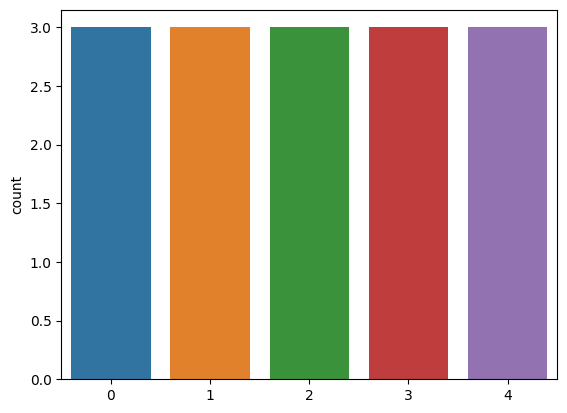

In [41]:
sample = naive_generate_discrete_uniform(5, 15)
sns.countplot(x=sample);

* see the problem - the numbers are VERY uniformly distributed:
    * for a dist over [0, 1, 2, 3, 4], for each 5 draws, you expect to see every number
    * so the first principle - of pseudo-random sequences - is violated!
    * plus, it is not even random at this point... be it uniform

* see:

In [44]:
display(naive_generate_discrete_uniform(5, 4, seed=666))
display(naive_generate_discrete_uniform(5, 5, seed=666))

[2, 4, 1, 3]

[2, 4, 1, 3, 0]

## Congruential Generators

### 1. (Simple) Linear Congruential Generator

* the basic idea is to generate a sequence $x_{0}, x_{1}, ..., x_{i}$ numbers of the form:
    * $x_{0} = (seed \mod m) + 1$
    * $x_{i} = (a*x_{i-1} + c) \mod m$, with  $0 \leq x_i < m$
* $a$ is then called the **multiplier**, and $c$ the **increment**


* this is basically what we implemented before... with no increment. which wasn't good.
* can we try the increment?

In [46]:
def repeat(func, n, *initial_args):
    if n <= 1:
        return func(*initial_args)
    else:
        return repeat(func, n-1, *func(*initial_args))

In [47]:
def discrete_simple_linear_congruence_generator(high: int, size: int, seed: int=None) -> list[int]:
    """Generate a discrete uniform random variable with a simple linear congruence generator."""
    seed = seed or int(perf_counter() * 1e6)
    start = ( seed % high ) + 1
    
    # find co-prime with n (or should we find a prime?) for a multiplier
    for multiplier in range(int(high ** .5), 1, -1):
        if gcd(multiplier, high) == 1:
            break
        
    # find an increment
    increment = 3 # whatever..
    
    # generate random numbers
    operation = lambda x: (multiplier * x  + increment)
    random_numbers = []
    x = start
    for _ in range(size):
        x = operation(x) % high
        random_numbers.append(x)
        
    return random_numbers

In [56]:
discrete_simple_linear_congruence_generator(5, 15, seed=1) # sometimes it gets locked!

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

[4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0]

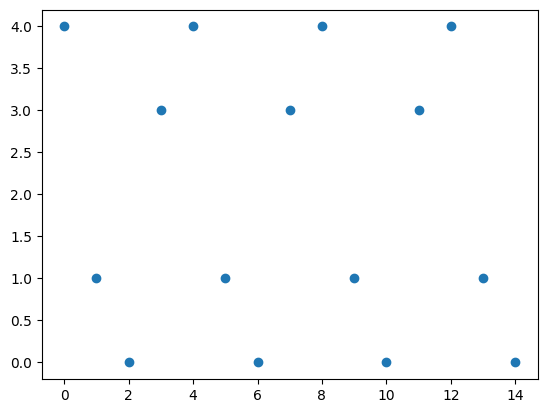

In [64]:
 # the multiplier never shows up!
sample = discrete_simple_linear_congruence_generator(5, 15, seed=2)
display(sample)
plt.scatter(range(len(sample)), sample);

* this clearly has easily solvable problems... (but one wants to see goodfellow!)

* still, the clear problems might not be such, since this will be the way to actually generate for the continuous uniform:
    * dividing the result by $m$,
    * and choosing a gigantic $m$ for that..

* still: here's when we need - already - some refreshing on number theory... - tomorrow!

* where we go into lattices and field properties

* seems like a great book..